In [1]:
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_distribution
from qiskit_aer import AerSimulator

In [2]:
# Define una función simple f(x).
def f(x):
    return x % 2  # Ejemplo: f(x)= x mod 2

In [3]:
# Crea un circuito cuántico con 4 qubits, 1 qubit auxiliar (y) para la 
# evaluación de la función f(x), y sus respectivos registros clásicos para 
# la medición.
n_qubits = 4
n_qubit_aux = 1
n_measure_register = n_qubits
n_measure_fx = 1

InputQubits = QuantumRegister(n_qubits, name='inputQ') 
Y = QuantumRegister(n_qubit_aux, name='y') 
Measure = ClassicalRegister(n_measure_register, name='measure')
MeasureFx = ClassicalRegister(n_measure_fx, name='measure_Fx')

# Crea el circuito cuántico.
qc = QuantumCircuit(InputQubits, Y, Measure, MeasureFx)

# Aplica la compuerta de Hadamard a los qubits de entrada.
qc.h(range(n_qubits)) 

In [4]:
# Define el oracle como un circuito separado.
oracle = QuantumCircuit(InputQubits, Y, name="    U_f(x)   ")
oracle.cx(0, n_qubits)  # El MSB (qubit Y) determina f(x).

In [5]:
# Agrega el oracle como un circuito de caja-negra.
qc.append(oracle.to_instruction(), range(n_qubits + n_qubit_aux))

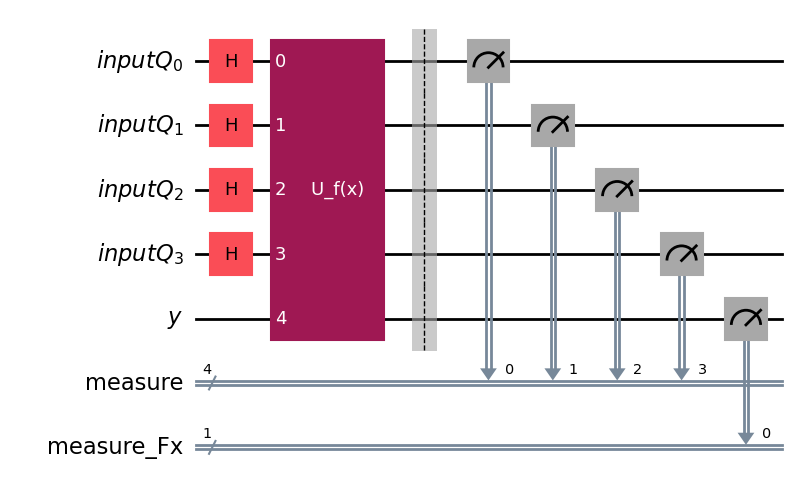

In [6]:
# Mide todos los qubits.
qc.barrier()
qc.measure(InputQubits,Measure)
qc.measure(Y,MeasureFx)

# Dibuja el circuito.
qc.draw('mpl')

In [7]:
# Aumenta el número de ejecuciones para reducir la varianza del muestreo.
shots = 100000

# Simula el circuito.
simulator = AerSimulator()
result = simulator.run(qc.decompose(reps=1), shots= shots).result()
counts = result.get_counts()

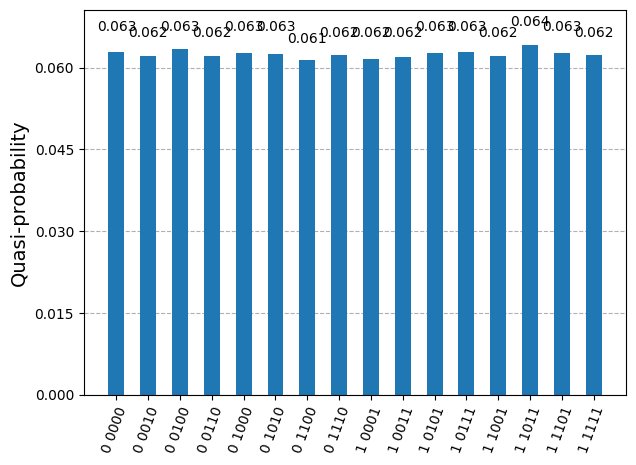

In [8]:
# Presenta los resultados.
plot_distribution(counts)

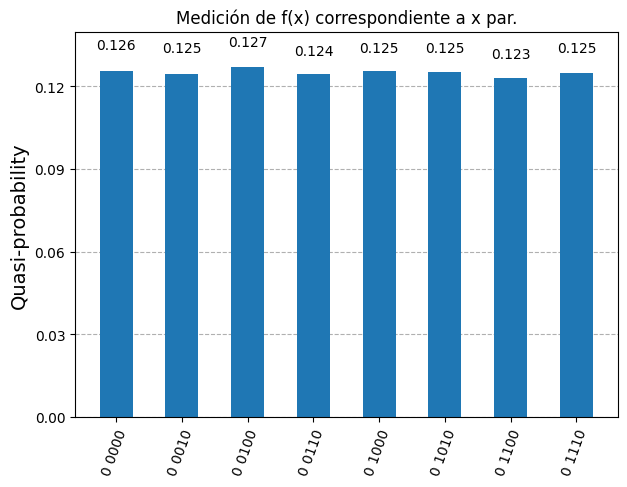

In [13]:
FxPar = {key: value for key, value in counts.items() if key.startswith('0')}
plot_distribution(FxPar, title='Medición de f(x) correspondiente a x par.')

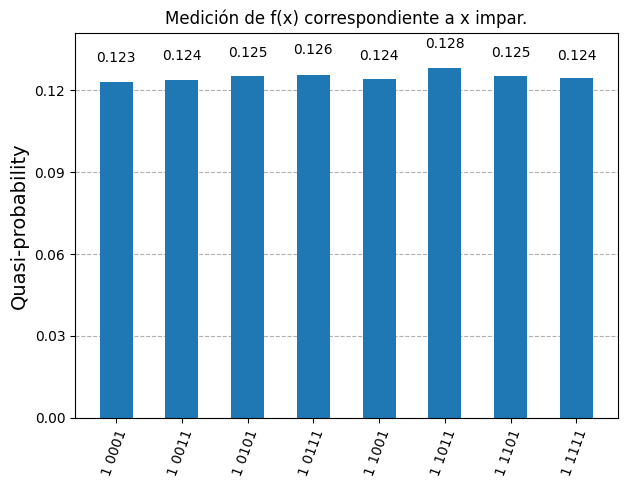

In [12]:
FxImPar = {key: value for key, value in counts.items() if key.startswith('1')}
plot_distribution(FxImPar, title='Medición de f(x) correspondiente a x impar.')